# Progetto di Programmazione di Applicazioni Data Intensive
#### Achilli Mattia 
#### Matricola: 0000847610 

## Caso di studio: Classificazione di banconote

- Dato un Dataset contente diverse istanze di valori di banconote prese da immagini si vuole classificare la banconota in autentica o meno
- Per la digitalizzazione delle banconote è stata utilizzata una fotocamera industriale normalmente utilizzata per l'ispezione delle banconote
- E' stato utilizzato uno strumento di trasformazione Wavelet per estrarre le features dalle immagini

## Comprensione dei dati

- Per prima cosa carico le principali librerie utilizzate 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

- Scarico il Dataset e lo importo attraverso read_csv di pandas, i dati tra le colonne sono separati con la virgola

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
data = pd.read_csv(URL, header=None, sep = ",")

- Come si può notare il dataset iniziale non ha i nomi delle colonne, dovremmo inserirle manualmente

In [3]:
data.head(5)

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.tail(5)

,0,1,2,3,4
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


- Assegno il nome delle colonne

In [5]:
data.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

- Significato delle colonne:
    - variance: varianza dell'immagine trasformata
    - skewness: asimmetria dell'imagine trasformata
    - curtosis: addensamento intorno al valore medio
    - entropy: entropia dell'immagine trasformata
    - class (da predire): classe dell'istanza, 0 falsa, 1 autentica 

In [6]:
data.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


- Come si può notare abbiamo 1372 istanze e 5 colonne

In [7]:
data.shape 

(1372, 5)

- Mentre i tipi di dato delle colonne sono i seguenti

In [8]:
data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

## Analisi Esplorativa dei dati

- Utilizziamo la funzione di pandas describe() per visualizzare diverse informazioni riguardanti i dati:
    - Numero di istanze
    - Media di ciascuna feature
    - Deviazione standard di ciscuna feature
    - Valore minimo di ciascuna feature
    - Percentili di ciascuna feature
    - Valore massimo di ciascuna feature

In [9]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


- Verifichiamo l'esistenza di valori nulli
    - In questo caso non ce ne sono

In [10]:
data.isnull().values.any()

False

- Ora visualizziamo il numero di banconote nelle due classi
    - Si può notare che abbiamo più casi di banconote contraffatte rispetto a banconote autentiche

In [11]:
data["class"].value_counts(normalize = True) * 100 #Percentuale

0    55.539359
1    44.460641
Name: class, dtype: float64

- Per visualizzarle meglio si può utilizzare un grafico a torta

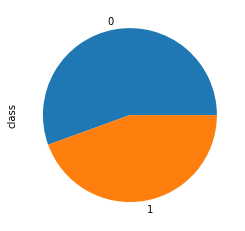

In [12]:
data["class"].value_counts().plot.pie();

- Ora mostriamo gli istogrammi delle features

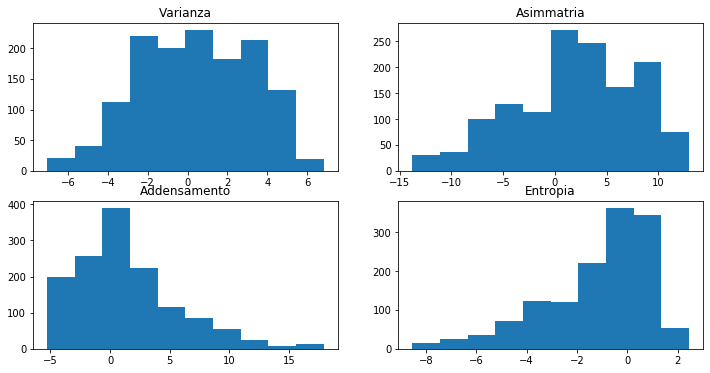

In [13]:
fig = plt.figure(figsize=(12, 6))

''' Varianza '''
plt.subplot(2, 2, 1)
plt.hist(data["variance"])
plt.title("Varianza")

''' Asimmetria '''
plt.subplot(2, 2, 2)
plt.hist(data["skewness"])
plt.title("Asimmatria")

''' Addensamento '''
plt.subplot(2, 2, 3)
plt.hist(data["curtosis"])
plt.title("Addensamento")

''' Entropia '''
plt.subplot(2, 2, 4)
plt.hist(data["entropy"])
plt.title("Entropia")

plt.show()

- Ora proviamo a vedere se ci sono delle correlazioni tra variabili
- Utilizzo data.corr() per vedere tutte le varie correlazioni tra le variabili
- Noto che le variabili che hanno più influenza sono in ordine:
    - Varianza
    - Asimmetria
    - Addensamento
    - Entropia

In [14]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2) #set_precision(2) = due numeri dopo la virgola

,variance,skewness,curtosis,entropy,class
variance,1.00,0.26,-0.38,0.28,-0.72
skewness,0.26,1.00,-0.79,-0.53,-0.44
curtosis,-0.38,-0.79,1.00,0.32,0.16
entropy,0.28,-0.53,0.32,1.00,-0.02
class,-0.72,-0.44,0.16,-0.02,1.00


- Proviamo a visualizzare un grafico a dispersione per vedere se c'è correlazione tra Varianza e Classe
- In generale si può notare come aumentando la varianza aumentiamo la possibilità che la la banconota sia contraffatta e viceversa

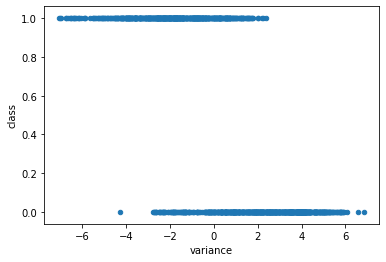

In [15]:
data.plot.scatter("variance", "class");

- Lo stesso con l'asimmetria ma qui abbiamo una minore correlazione

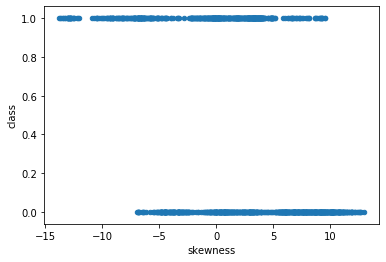

In [16]:
data.plot.scatter("skewness", "class");

- Per il caso dell'addensamento ed entropia abbiamo meno correlazione con la classe

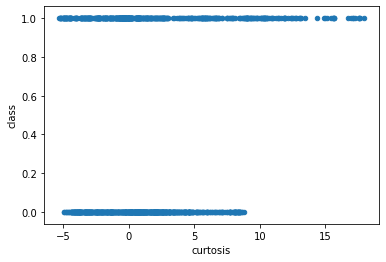

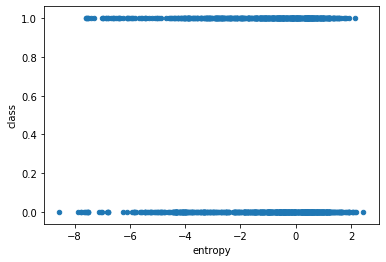

In [17]:
data.plot.scatter("curtosis", "class");
data.plot.scatter("entropy", "class");

## Suddivisione dei dati, preprocessamento dei dati per l'addestramento

- Per prima cosa dividiamo i dati:
    - Prendiamo come y la variabile class cioè quella da predire
    - Prendiamo come X le altre colonne:
        - Come visualizzato già sopra le prime 3 features hanno un'influenza maggiormente positiva, in particolare la prima che rappresenta la     varianza, includendo anche l'ultima colonna penalizziamo di pochissimo il modello

In [33]:
y = data["class"]
X = data.iloc[:, :3] 
#X = data.iloc[:, :4] #Per provare con tutte le features

- Abbiamo la y con la sola colonna "class" mentre la X con le 3 colonne (variance, skewness e curtosis)

In [34]:
y.shape, X.shape

((1372,), (1372, 3))

- Ora suddividiamo i dati in training set e validation set
- Utilizziamo 2/3 dei dati per l'addestramento e 1/3 dei dati per il validation
- Utilizzo un random_state per la riproducibilità dei dati

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,             # dati da suddividere
    test_size=1/3,    # proporzione: 2/3 training, 1/3 validation
    random_state=42   # seed per la riproducibilità
)

- Visualizziamo come sono stati divisi i dati in training e validation

In [36]:
X_train.shape, y_train.shape

((914, 3), (914,))

In [37]:
pd.DataFrame(y_train)["class"].value_counts()

0    503
1    411
Name: class, dtype: int64

- E quelli di validation

In [38]:
X_val.shape, y_val.shape

((458, 3), (458,))

In [39]:
pd.DataFrame(y_val)["class"].value_counts()

0    259
1    199
Name: class, dtype: int64

## Addestramento di primi modelli sui dati

- Dopo aver suddiviso i dati proviamo subito dei semplici modelli

- Utilizzo da subito un Pipeline per aumentare la leggibilità del modello e scrivere codice più compatto
- Utilizzo uno StandardScaler per standardizzare i dati e aumentarne l'accuratezza
- Utilizzo inizialmente un semplice Perceptron per vedere come va l'accuratezza

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Perceptron

model = Pipeline([
    ("scaler", StandardScaler()),
    ("perceptron", Perceptron(random_state = 42)) #Utilizzo il random_state per la riproducibilità
])

- Addestro il modello sui dati di training

In [41]:
model.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('perceptron',
                 Perceptron(alpha=0.0001, class_weight=None,
                            early_stopping=False, eta0=1.0, fit_intercept=True,
                            max_iter=1000, n_iter_no_change=5, n_jobs=None,
                            penalty=None, random_state=42, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False))],
         verbose=False)

- Proviamo a vedere i pesi che ha trovato il modello

In [42]:
pd.Series(index=X.columns, data=model.named_steps["perceptron"].coef_.ravel())

variance   -10.710643
skewness   -11.048710
curtosis   -12.172469
dtype: float64

- Possiamo notare che l'accuratezza trovato utilizzando il Perceptron è già buona

In [43]:
model.score(X_val, y_val)

0.9585152838427947

- Ora proviamo ad utilizzare altri modi per valutare l'accuratezza del modello come la matrice di confusione

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_val) #Effettuiamo le predizioni sui dati di validation
cm = confusion_matrix(y_val, y_pred) #Matrice di confusione

In [45]:
pd.DataFrame(cm, columns = model.named_steps["perceptron"].classes_, index = model.named_steps["perceptron"].classes_)

,0,1
0,259,0
1,19,180


- Proviamo a verificare anche la precision, recall e f1 score

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [47]:
precision_score(y_val, y_pred, average = None)

array([0.93165468, 1.        ])

In [48]:
recall_score(y_val, y_pred, average = None)

array([1.        , 0.90452261])

In [49]:
f1_score(y_val, y_pred, average=None)

array([0.96461825, 0.94986807])

- Dopo aver provato con un Perceptron e aver ottenuto già buoni risultati proviamo con una Logistic Regression che ci permetterà di ottenere risultati migliori
- Come prima utilizzo la Pipeline per aumentare la leggibilità e scrivere meno codice

In [50]:
from sklearn.linear_model import LogisticRegression
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(random_state=42))
])

- Addestriamo il modello sugli stessi dati di prima

In [51]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

- Valutando l'accuratezza del modello si può notare come con una LogisticRegression si ottenga un'accuratezza migliore rispetto prima

In [52]:
model.score(X_val, y_val)

0.9868995633187773

- Come prima verifichiamo la matrice di confusione, precision, recall e f1 score per vedere se c'è differenza

In [53]:
y_pred = model.predict(X_val) #Prima faccio le predizioni

- Anche qui si può notare una differenza abbastanza rilevante nella matrice di confusione

In [54]:
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, columns = model.named_steps["logreg"].classes_, index = model.named_steps["logreg"].classes_)

,0,1
0,255,4
1,2,197


- Ci aspettiamo che precision, recall e f1 score siano migliori rispetto al modello Perceptron

In [55]:
precision_score(y_val, y_pred, average = None)

array([0.9922179, 0.9800995])

In [56]:
recall_score(y_val, y_pred, average = None)

array([0.98455598, 0.98994975])

In [57]:
f1_score(y_val, y_pred, average = None)

array([0.98837209, 0.985     ])

- Ora proviamo la regolarizzazione sempre attraverso la LogisticRegression:
    - Utilizziamo il parametro solver="saga" per utilizzare la regolarizzazine
    - Senza specificare niente di default abbiamo la regolarizzazione L2

In [59]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(solver="saga", random_state=42, C = 1000, )) # C alto bassa regolarizzazione
])

- Addestriamo il modello

In [60]:
model.fit(X_train, y_train)

C:\Users\Mattia\anaconda3\envs\deeplearn\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=1000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

- Accuratezza leggermente migliore al modello di prima senza regolarizzazione

In [61]:
model.score(X_val, y_val)

0.9890829694323144

- Proviamo a regolarizzare utilizzando solo L1 (Lasso)

In [62]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(solver="saga", random_state=42, penalty="l1", C=0.01)) 
])

In [63]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

- Possiamo vedere come in questo caso la regolarizzazione L1 non dia buoni risultati al contrario della L2

In [64]:
model.score(X_val, y_val)

0.8493449781659389

- Vediamo i pesi azzerati dal modello:
    - Solo per curtosis

In [65]:
pd.Series(index=X.columns, data=model.named_steps["logreg"].coef_.ravel()) 

variance   -1.211650
skewness   -0.256856
curtosis    0.000000
dtype: float64

- Proviamo a regolarizzare sia utilizzando L1 che utilizzando L2 (elasticnet)

In [66]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(solver="saga", random_state=42, penalty="elasticnet", C=10000, l1_ratio = 0.01))
])

In [67]:
model.fit(X_train, y_train)

C:\Users\Mattia\anaconda3\envs\deeplearn\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=10000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=0.01, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='elasticnet', random_state=42,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

- Accuratezza uguale al modello con regolarizzazione L2

In [68]:
model.score(X_val, y_val)

0.9890829694323144

## K-cross validation e Grid search

- Ora che abbiamo visto diversi modelli possiamo utilizzare la k-cross validation insieme alla grid search per trovare gli iperparametri migliori dato un modello iniziale

- Per dividere i fold utilizzo la StratifiedKFold per dividere i dati nelle due classi equamente

In [69]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
outer_cv_skf = StratifiedKFold(3, shuffle=True, random_state=42) #Esterna in 3 fold
inner_cv_skf = StratifiedKFold(5, shuffle=True, random_state=42) #Interna in 5 fold

- Impostiamo il modello base e la griglia di iperparametri che la GridSearch utilizzerà
- Il modello base comprende la standardizzazione, LogisticRegression e in aggiunta proviamo ad inserire una PolynomialFeatures

In [70]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("logreg", LogisticRegression(solver="saga", random_state=42))
])

- Scomponiamo i casi da provare in due griglie:
 - La prima con L1 e L2 e i diversi gradi ha 4 x 2 x 3 = 24 casi possibili
 - La seconda ha 4 x 1 x 3 x 2 = 24 casi possibili

In [71]:
grid = [
    {
        "poly__degree": [2, 3, 4, 5],
        "logreg__penalty": ["l2", "l1"],
        "logreg__C": [0.1, 1, 10]
    },
    {
        "poly__degree": [2, 3, 4, 5],
        "logreg__penalty": ["elasticnet"],
        "logreg__C": [0.1, 1, 10],
        "logreg__l1_ratio": [0.2, 0.5]
    }
]

- Utilizziamo la nested cross-validation per generare k fold "esterni" su tutti i dati disponibili e che per ciascuno si esegua il tuning degli iperparametri con una cross validation "interna" usando le parti di training dei fold esterni
- Creiamo una funzione che itera sui dati nel fold esterno e applica la grid search su quelli di fold interno

In [72]:
import warnings #Per togliere i warning
warnings.filterwarnings("ignore")  

def nested_cv(model, grid):
    results = []
    gss = []
    for train_indices, val_indices in outer_cv_skf.split(X, y):
        X_train = X.iloc[train_indices]
        y_train = y.iloc[train_indices]
        X_val = X.iloc[val_indices]
        y_val = y.iloc[val_indices]
        gs = GridSearchCV(model, grid, cv=inner_cv_skf)
        gs.fit(X_train, y_train)
        gss.append(gs)
        results.append(gs.score(X_val, y_val))
    index = np.argmax(results) #Prendo la grid search che ha trovato gli iperparametri migliori
    return results, gss[index]

- Ora applichiamola al nostro modello, seleziono poi il modello con accuratezza migliore

In [73]:
res, gs = nested_cv(model, grid)
res

[0.9956331877729258, 0.9890590809628009, 0.9956236323851203]

- Visualizziamo i migliori iperparametri trovati dalla grid search

In [74]:
gs.best_params_

{'logreg__C': 1, 'logreg__penalty': 'l2', 'poly__degree': 2}

- Mostriamo i risultati in un DataFrame per visualizzarli meglio
 - Il miglior risultato ottenuto è vicino al 100%

In [109]:
results = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(10) #Ordina per risultato migliore
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__penalty,param_poly__degree,param_logreg__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.011334,0.001003,0.001609,0.003217,1,l2,2,NaN,"{'logreg__C': 1, 'logreg__penalty': 'l2', 'pol...",1.0,1.000000,1.000000,0.983607,0.989011,0.994524,0.006922,1
20,0.020636,0.005806,0.001608,0.003216,10,l1,2,NaN,"{'logreg__C': 10, 'logreg__penalty': 'l1', 'po...",1.0,1.000000,1.000000,0.983607,0.989011,0.994524,0.006922,1
12,0.020128,0.008660,0.002008,0.003107,1,l1,2,NaN,"{'logreg__C': 1, 'logreg__penalty': 'l1', 'pol...",1.0,1.000000,1.000000,0.983607,0.989011,0.994524,0.006922,1
40,0.021947,0.004118,0.001591,0.000484,10,elasticnet,2,0.2,"{'logreg__C': 10, 'logreg__l1_ratio': 0.2, 'lo...",1.0,1.000000,1.000000,0.983607,0.989011,0.994524,0.006922,1
16,0.013211,0.002036,0.000803,0.000754,10,l2,2,NaN,"{'logreg__C': 10, 'logreg__penalty': 'l2', 'po...",1.0,1.000000,1.000000,0.983607,0.989011,0.994524,0.006922,1
44,0.027525,0.004576,0.001398,0.000491,10,elasticnet,2,0.5,"{'logreg__C': 10, 'logreg__l1_ratio': 0.5, 'lo...",1.0,1.000000,1.000000,0.983607,0.989011,0.994524,0.006922,1
36,0.028923,0.002275,0.001397,0.000489,1,elasticnet,2,0.5,"{'logreg__C': 1, 'logreg__l1_ratio': 0.5, 'log...",1.0,1.000000,1.000000,0.983607,0.989011,0.994524,0.006922,1
32,0.030518,0.007793,0.001799,0.001164,1,elasticnet,2,0.2,"{'logreg__C': 1, 'logreg__l1_ratio': 0.2, 'log...",1.0,1.000000,1.000000,0.983607,0.989011,0.994524,0.006922,1
0,0.013357,0.000495,0.001598,0.000482,0.1,l2,2,NaN,"{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'p...",1.0,0.989071,0.994536,0.983607,0.983516,0.990146,0.006391,9
24,0.020607,0.006564,0.001636,0.003272,0.1,elasticnet,2,0.2,"{'logreg__C': 0.1, 'logreg__l1_ratio': 0.2, 'l...",1.0,0.989071,0.994536,0.983607,0.967033,0.986849,0.011315,10


- Misuriamo le solite metriche sul modello migliore trovato dalla Grid Search

In [110]:
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, columns = gs.classes_, index = gs.classes_) #Matrice di confusione

,0,1
0,259,0
1,0,199


- Ora misuriamo precision, recall e f1 score

In [111]:
y_pred = gs.predict(X_val) #Prima facciamo le predizioni

In [112]:
precision_score(y_val, y_pred, average = None)

array([1., 1.])

In [113]:
recall_score(y_val, y_pred, average = None)

array([1., 1.])

In [114]:
f1_score(y_val, y_pred, average = None)

array([1., 1.])

- Prima di procedere proviamo a creare un modello casuale che fa delle predizioni casuali

In [115]:
import random
random.seed(12345)

def random_prediction(data):
    return [random.randint(0,1) for n in range(data.shape[0])]

- Predizioni random e reali

In [116]:
random_prediction = random_prediction(X_val)
predicted = gs.predict(X_val)

- Ne calcoliamo l'accuratezza

In [117]:
count = 0
for i in range(X_val.shape[0]):
    if random_prediction[i] == predicted[i]:
        count = count + 1
accuracy_random = count / X_val.shape[0]
accuracy_random #Intorno al 50%

0.5

- Visualizziamo le solite metriche

In [118]:
cm = confusion_matrix(y_val, random_prediction)
pd.DataFrame(cm, columns = gs.classes_, index = gs.classes_) #Matrice di confusione

,0,1
0,137,122
1,107,92


In [119]:
precision_score(y_val, random_prediction, average = None)

array([0.56147541, 0.42990654])

In [120]:
recall_score(y_val, random_prediction, average = None)

array([0.52895753, 0.46231156])

In [121]:
f1_score(y_val, random_prediction, average = None)

array([0.54473161, 0.44552058])

## Valutazione di modelli con calcolo degli intervalli di confidenza fissata la confidenza del 95%

- Ora confrontiamo i modelli:
    - Prendo il miglior modello trovato dalla grid search, un altro modello tra quelli testati sopra e il modello che effettua predizioni casuali

In [122]:
from sklearn.linear_model import LogisticRegression
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(solver="saga", random_state=42, penalty="l1", C=0.01)) 
])
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

- L'accuratezza di questo modello era la seguente

In [123]:
model.score(X_val, y_val)

0.8493449781659389

- Vediamo l'intervallo di confidenza dei modelli

In [124]:
def conf_interval(a, N, Z=1.96): # 1 - 𝛼 = 0.95 (𝛼=0.05), Z = 1.96
    c = (2 * N * a + Z**2) / (2 * (N + Z**2))
    d = Z * np.sqrt(Z**2 + 4*N*a - 4*N*a**2) / (2 * (N + Z**2))
    return c - d, c + d

In [125]:
from scipy.stats import norm

def model_conf_interval(model, X, y, level=0.95):
    a = model if type(model) == float else model.score(X, y)
    N = len(X)
    Z = norm.ppf((1 + level) / 2)
    return conf_interval(a, N, Z)

- Per il modello trovato dalla grid search

In [126]:
model_conf_interval(gs, X_val, y_val)

(0.9916822997430693, 0.9999999999999999)

- Per il modello casuale

In [127]:
model_conf_interval(accuracy_random, X_val, y_val)

(0.4543992865819769, 0.5456007134180231)

- Per il modello definito sopra

In [128]:
model_conf_interval(model, X_val, y_val) 

(0.8136862105552716, 0.8791922521473097)

- Già da qui si può constatare come il modello più affidabile sia quello trovato dalla GridSearch

- Ora vediamo la differenza che c'è tra questi modelli

In [129]:
from scipy.stats import norm

def diff_interval(a1, a2, N1, N2, Z):
    d = abs(a1 - a2)
    sd = np.sqrt(a1 * (1-a1) / N1 + a2 * (1-a2) / N2)
    return d - Z * sd, d + Z * sd

def model_diff_interval(m1, m2, X, y, level=0.95): #Confidenza fissata al 95%
    a1 = m1 if type(m1) == float else  m1.score(X, y)
    a2 = m2 if type(m2) == float else m2.score(X, y)
    
    N1 = len(X) #In questo caso hanno gli stessi dati
    N2 = N1
    Z = norm.ppf((1 + level) / 2)
    return diff_interval(a1, a2, N1, N2, Z)

- Differenza tra modello sopra e quello della grid search, differenza abbastanza significativa

In [130]:
model_diff_interval(model, gs, X_val, y_val) 

(0.11789462000488057, 0.18341542366324162)

- Differenza tra il modello della grid search e quello casuale al 99% di condifenza, differenza molto significativa

In [131]:
model_diff_interval(accuracy_random, gs, X_val, y_val, 0.99)

(0.4398197004798157, 0.5601802995201842)

- Tra tutti i modelli testati si può dedurre che il modello migliore sia quello ottenuto dalla Grid Search che utilizza la standardizzazione, la regolarizzazione e grado 2 del polinomio

- Questi sono i parametri trovati dal modello migliore dalla GridSearch:
    - Abbiamo parametri in più generati dal grado 2 del polinomio
    - Anche qui si può visualizzare come alla varianza venga dato più peso rispetto alle altre variabili

In [132]:
pd.Series(index=gs.best_estimator_.named_steps["poly"].get_feature_names(["variance", "skewness", "curtosis"]), data=gs.best_estimator_.named_steps["logreg"].coef_.ravel())

variance            -4.159476
skewness            -3.851488
curtosis            -3.714692
variance^2           0.570971
variance skewness    1.374365
variance curtosis    0.120883
skewness^2          -0.675577
skewness curtosis    0.413208
curtosis^2           0.720775
dtype: float64

## Reti neurali utilizzando Keras

- Ora proviamo ad utilizzare una rete neurale utilizzando Keras di TensorFlow
- Importo le librerie

In [133]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

- Creo la struttura della rete neurale 

In [134]:
model = Sequential([
    Dense(32, activation="relu", input_dim=3),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(2, activation="softmax") #Output 2 neuroni
])

- Trasforma la classe da predire da vettore a matrice utilizzando to_categorical

In [135]:
from keras.utils import to_categorical
yt_train = to_categorical(y_train)
yt_val = to_categorical(y_val)

In [136]:
yt_train[:5], yt_val[:5]

(array([[1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.]], dtype=float32),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32))

- Compiliamo e addestriamo la rete:
    - Utilizzo adam come optimizer
    - Addestro con 20 epoche 

In [137]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, yt_train, epochs = 20, validation_data = (X_val, yt_val))

Train on 914 samples, validate on 458 samples
Epoch 1/20
914/914 [==============================] - 0s 151us/step - loss: 0.5212 - accuracy: 0.7768 - val_loss: 0.4384 - val_accuracy: 0.8122
Epoch 2/20
914/914 [==============================] - 0s 46us/step - loss: 0.3689 - accuracy: 0.8457 - val_loss: 0.3127 - val_accuracy: 0.8646
Epoch 3/20
914/914 [==============================] - 0s 48us/step - loss: 0.2548 - accuracy: 0.9190 - val_loss: 0.2049 - val_accuracy: 0.9563
Epoch 4/20
914/914 [==============================] - 0s 51us/step - loss: 0.1622 - accuracy: 0.9770 - val_loss: 0.1290 - val_accuracy: 0.9913
Epoch 5/20
914/914 [==============================] - 0s 55us/step - loss: 0.0977 - accuracy: 0.9923 - val_loss: 0.0745 - val_accuracy: 0.9913
Epoch 6/20
914/914 [==============================] - 0s 53us/step - loss: 0.0555 - accuracy: 0.9934 - val_loss: 0.0466 - val_accuracy: 0.9913
Epoch 7/20
914/914 [==============================] - 0s 50us/step - loss: 0.0358 - accuracy: 0

- Valutiamo il modello e otteniamo un'accuratezza circa del 100% e un errore molto basso

In [138]:
model.evaluate(X_val, yt_val)

458/458 [==============================] - 0s 20us/step


[0.0035141769250881284, 1.0]